SURYA KIRAN C -21BCE1110

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load the dataset.

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


 Data preprocessing.

In [3]:
data.shape

(200, 5)

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Uni Variate Analysis

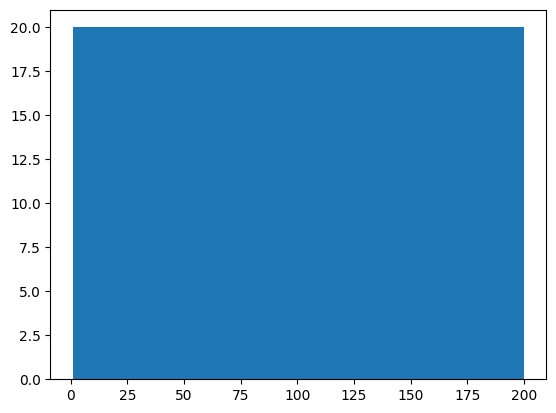

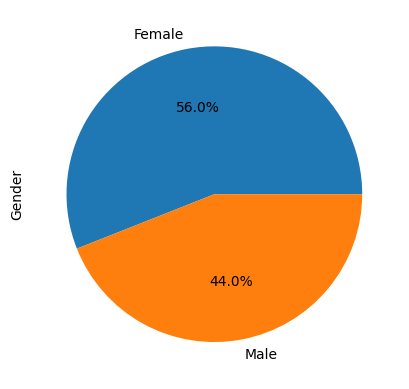

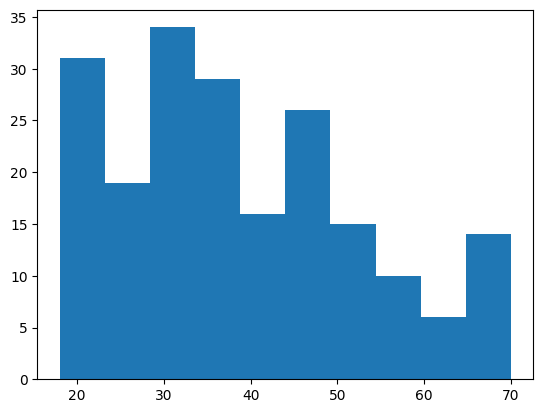

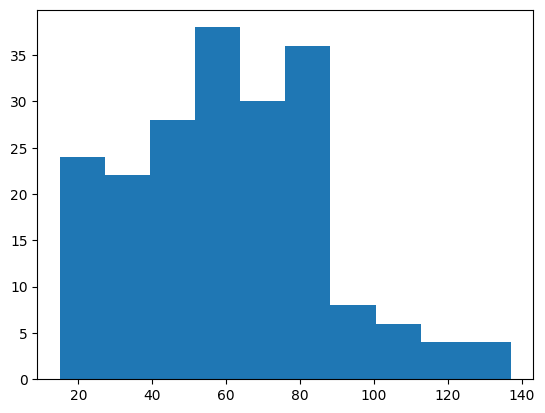

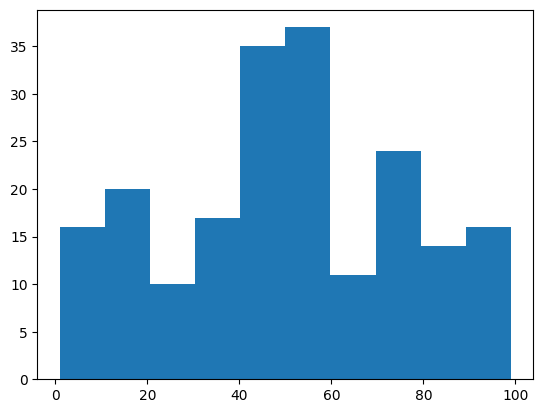

In [8]:
for i in data.columns:
    if(i!='Gender'):
        plt.hist(data[i])
        plt.show()
    else:
        data[i].value_counts().plot.pie(autopct='%1.1f%%')
        plt.show()

Bi Variate Analysis

Scatter Plot

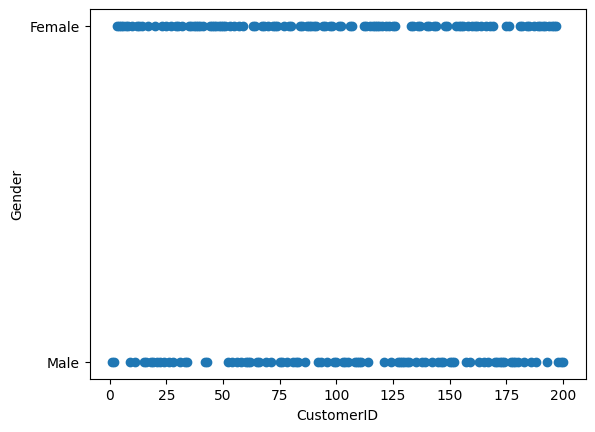

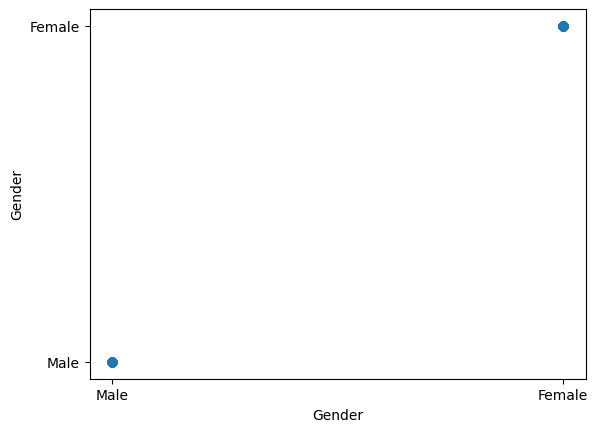

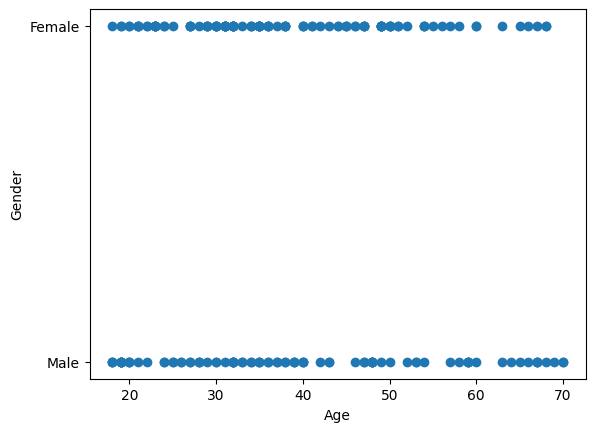

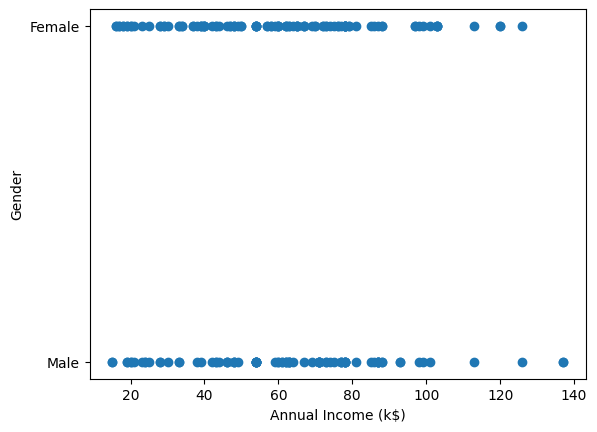

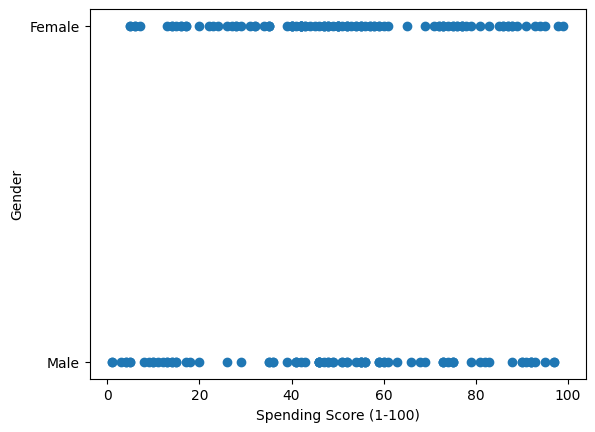

In [9]:
for i in data.columns:
  plt.scatter(data[i],data['Gender'])
  plt.xlabel(i)
  plt.ylabel("Gender")
  plt.show()

Multivariate Variate Analysis

Pairplot

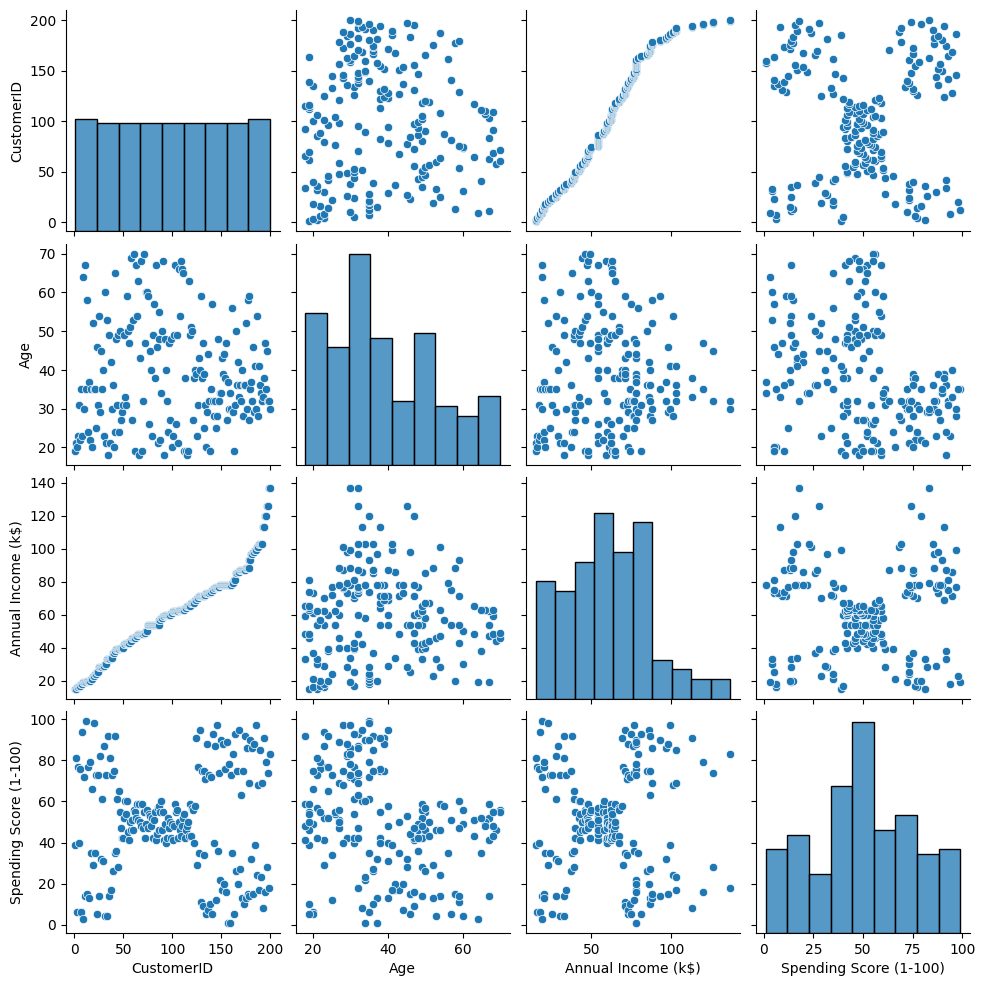

In [10]:
sns.pairplot(data)

Heatmap

<Axes: >

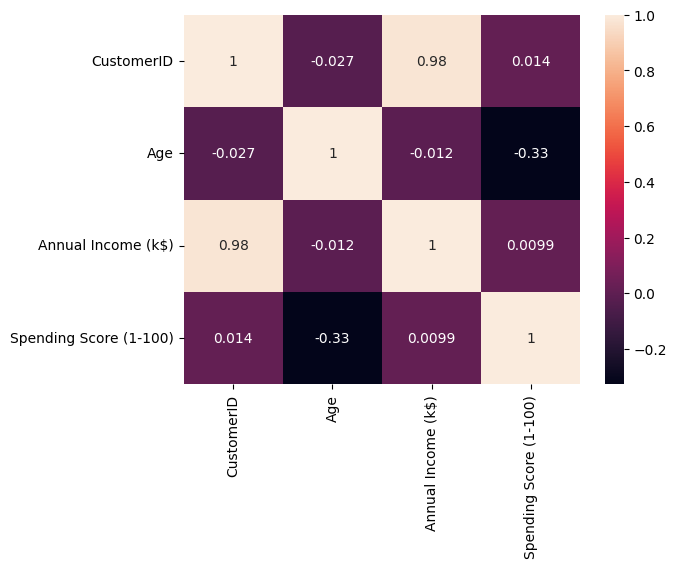

In [11]:
sns.heatmap(data.corr(),annot=True)

Machine Learning approach with clustering algorithm

In [12]:
from sklearn.cluster import KMeans

In [20]:
data.Gender = data.Gender.map({'Male':1,"Female":0})

In [21]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data.drop(columns = ['CustomerID',"Age","Gender"]))
    wcss.append(kmeans.inertia_)

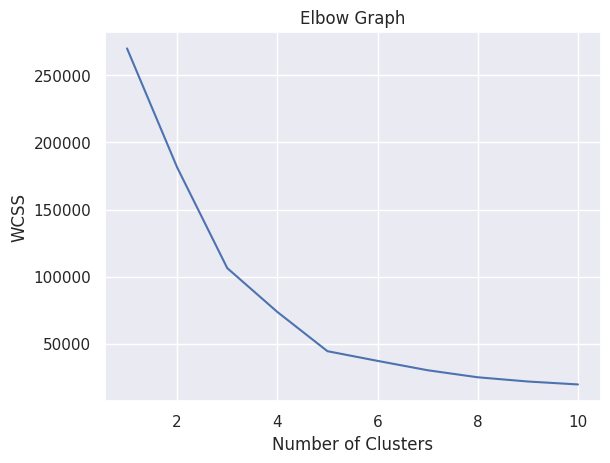

In [22]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
model = KMeans(n_clusters = 5)
data['cluster'] = model.fit_predict(data)

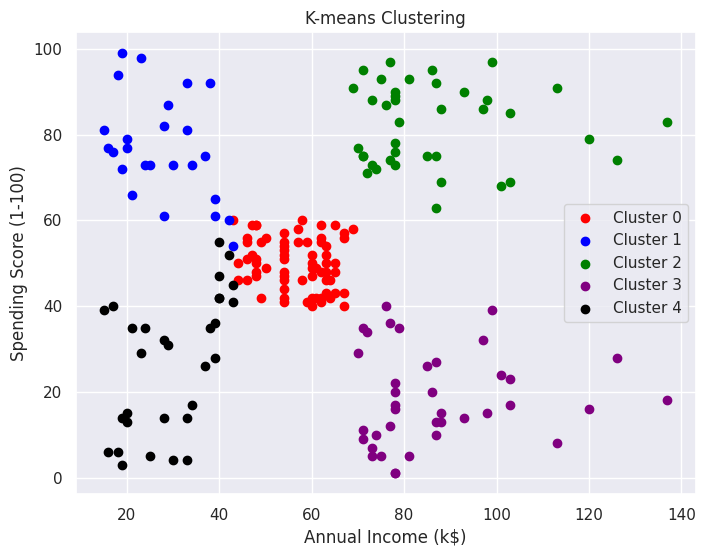

In [24]:
plt.figure(figsize=(8, 6))

colors = ['red', 'blue', 'green', 'purple','black']

for cluster_label, color in zip(range(5), colors):
    cluster_data = data[data['cluster'] == cluster_label]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], c=color, label=f'Cluster {cluster_label}')

plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()